# Bitcoin Forecasting
**GOAL**: Predict bitcoin prices, forecasting future fluctuations in its price to allow an investor to make optimal decisions.


In [ ]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-3241ff7a-bacb-ad87-3ade-4bd8e929dac9)


# Data
- We're going to get the prices of Bitcoin from 01 October 2013 to 18 May 2021.

## Why These Dates?
- Because 01 October 2013 is when our data source (Coindesk) started recording the price of Bitcoin.



In [ ]:
# Download Bitcoin historical data from GitHub
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-08-11 14:29:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-08-11 14:29:28 (7.14 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing Time Series Data with pandas
- Our data is in CSV (comma separated values) format, we'll use the pandas read_csv() function.

- Because our data has a date component, we'll tell pandas to parse the dates using the parse_dates parameter passing it the name our of the date column ("Date").

In [ ]:
import pandas as pd

#Parse dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
# How many samples do we have?
len(df)

2787

# Seasonality
- We've collected the historical price of Bitcoin for the past ~8 years but there's only 2787 total samples.

- Often in time series data, the number of samples isn't as large as other kinds of data.

- The frequency at which a time series value is collected is often referred to as **seasonality**.

- This is usually mesaured in number of samples per year.

- Deep learning algorithms usually flourish with lots of data, in the range of thousands to millions of samples.

In our case, we've got the daily prices of Bitcoin, a max of 365 samples per year.

To simplify, we remove some of the columns from our data so we're only left with a date index and the closing price.


In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


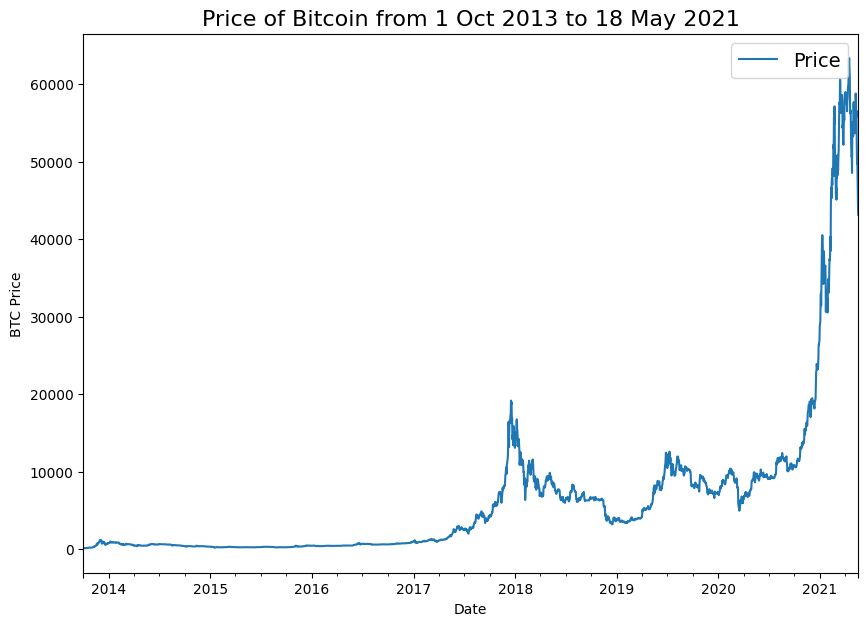

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

## Importing time series data with Python's CSV module



In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

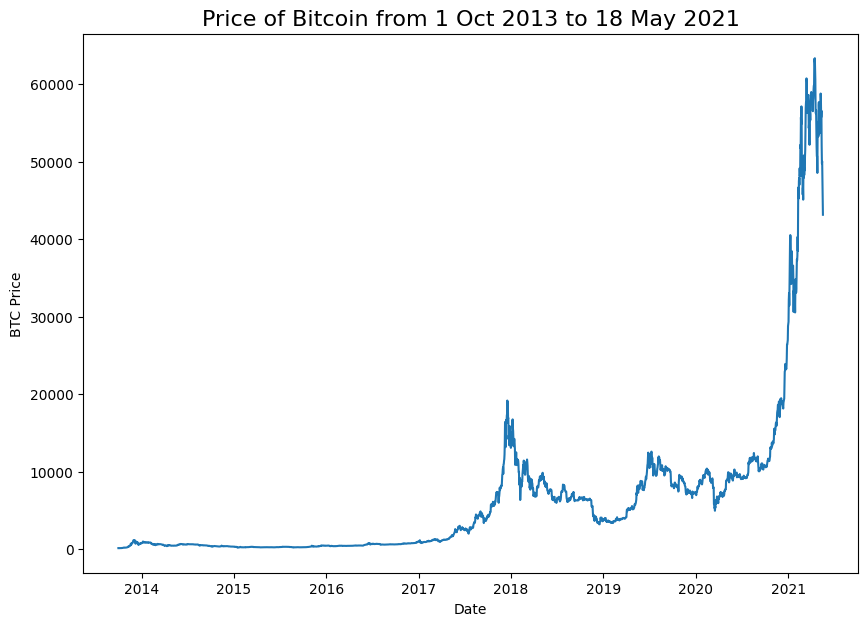

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

# Data Preparation: Training-Test Split
- `train_test_split()` randomly chooses data points to be put into the test set.

- However, for time series problems, the test data should always be the most recent data points.


## Splitting the Data




In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

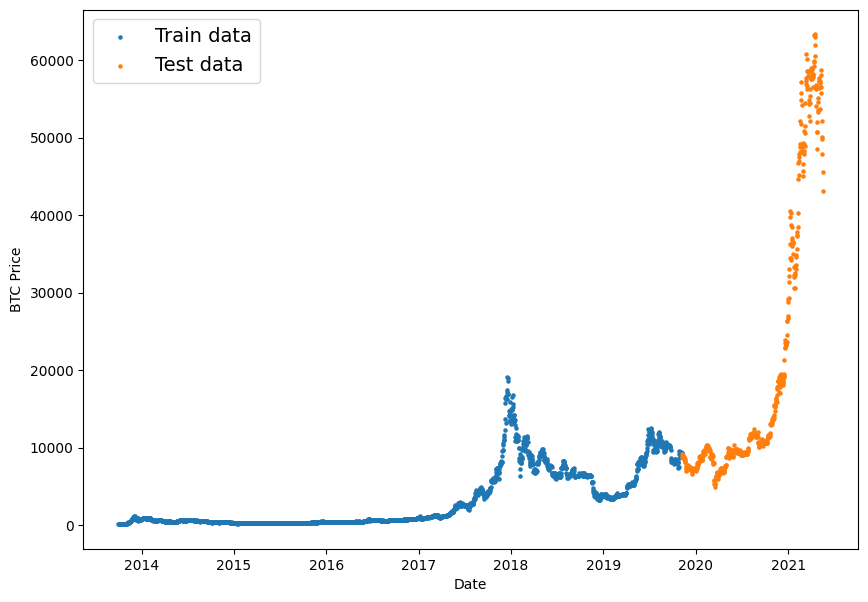

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
#Plotting function

def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)



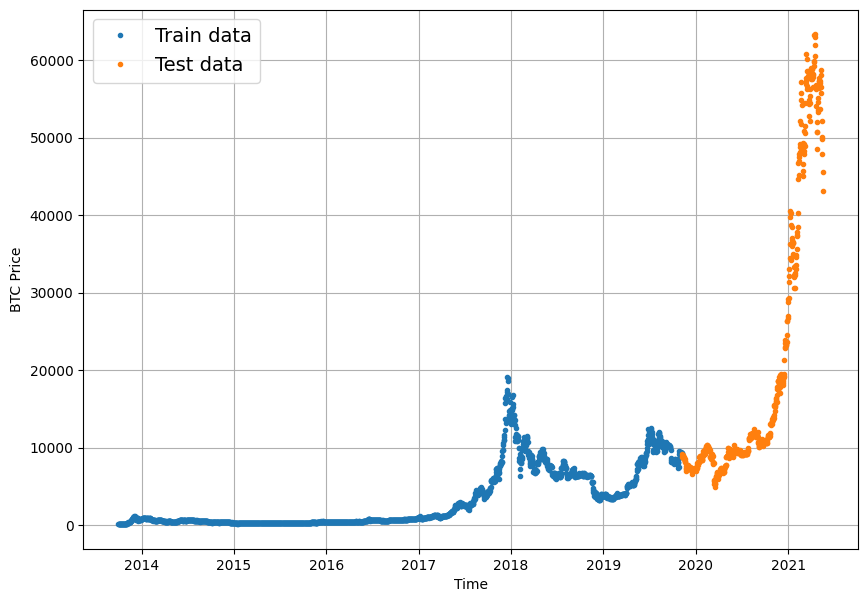

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")


# Horizons and Windows
- **horizon** = number of timesteps to predict into future

- **window** = number of timesteps from past used to predict horizon

For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

| **Model Number** | **Model Type**          | **Horizon size** | **Window size** |
|------------------|-------------------------|------------------|-----------------|
| 0                | Naïve model (baseline)  |                  |                 |
| 1                | Dense model             | 1                | 7               |
| 2                | Dense model             | 1                | 30              |
| 3                | Dense model             | 7                | 30              |
| 4                | Conv1D                  | 1                | 7               |
| 5                | LSTM                    | 1                | 7               |
| 6                | LSTM                    | 1                | 7               |
| 7                | N-BEATs Algorithm       | 1                | 7               |
| 8                | Ensemble                | 1                | 7               |
| 9                | Future prediction model | 1                | 7               |

# Model 0: Naive Forecast
- Requires no training at all.

- That's because all the naïve model does is use the previous timestep value to predict the next timestep value.

The formula looks like this:





\begin{equation}
{y}_{t} = y_{t-1}
\end{equation}

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1]
# Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10


(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

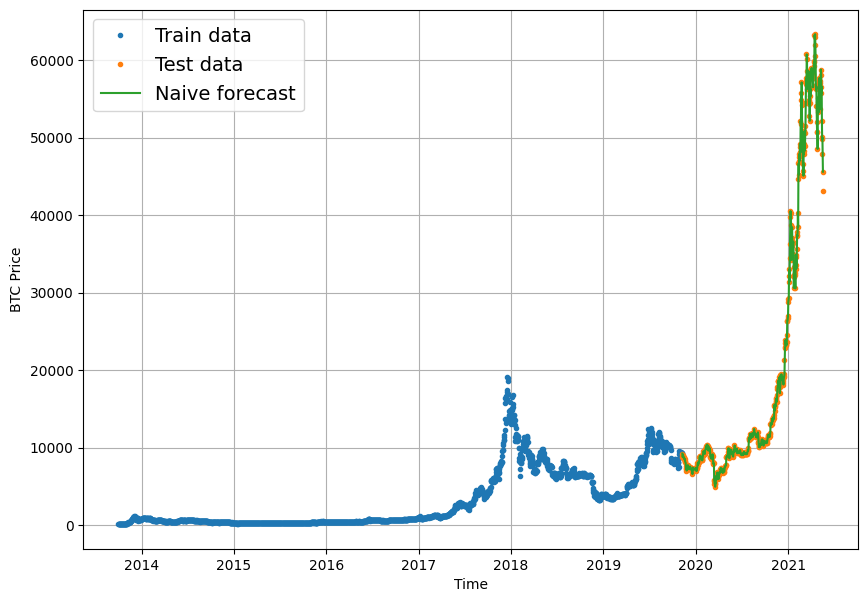

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");


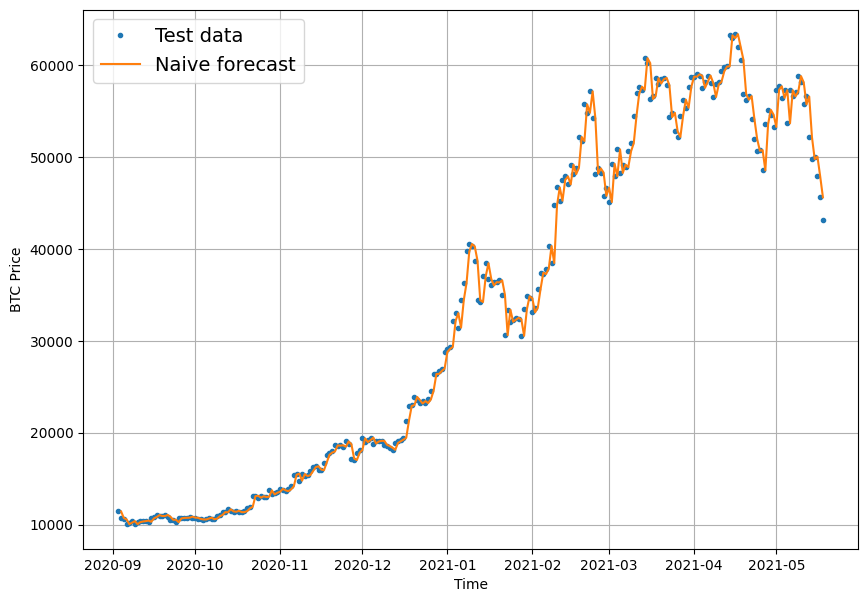

In [ ]:
#zoom in
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");


This makes sense because the naive forecast uses the previous timestep value to predict the next timestep value.

# Evaluating a time series model
The main thing we will be evaluating is: **how do our model's predictions (y_pred) compare against the actual values (y_true)?**

## Scale Dependent Errors
These are metrics which can be used to compare time series values and forecasts that are on the same scale.


1. **Mean Absolute Error**
  - Easy to interpret (a forecast is X amount different from actual amount).
  - Forecast methods which *minimises the MAE* will lead to **forecasts of the median**.

  - `tf.keras.metrics.mean_absolute_error()`

2. **Root Mean Square Error**
  - Forecasts which *minimise the RMSE* lead to** forecasts of the mean**.
  - `tf.sqrt(tf.keras.metrics.mean_square_error())`

## Percentage Errors
Percentage errors do not have units, this means they can be **used to compare forecasts across different datasets.**

1. **Mean Absolute Percentage Error**
  - Most commonly used percentage error.
  - May explode (not work) if y=0.
  - `tf.keras.metrics.mean_absolute_percentage_error()`

2. **Symmetric MAPE**
  - Recommended **not** to be used by Forecasting: Principles and Practice, though it is used in forecasting competitions.
  - Requires custom implementation.

## Scaled Errors
An alternative to percentage errors when comparing forecast performance across different time series.

1. **Mean Absolute Scaled Error**
  - MASE equals one for the naive forecast (or very close to one).

  - A forecast which performs better than the naïve should get <1 MASE.

  - sktime's `mase_loss`

In [ ]:
#MASE function
import tensorflow as tf

def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  # calculate the mean (average) value of a tensor along specified dimensions.

  #Find MAE
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

- The y_true[1:] slice represents all true values starting from the second value (index 1), and y_true[:-1] slice represents all true values except the last one.

- This calculation assumes a seasonality of 1 day, which means it's comparing each day's value with the previous day's value.

- The returned ratio represents how much better or worse the model's predictions are compared to a simple naive forecasting approach, adjusted by the seasonality.

In [ ]:
# compile evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

- Taking a look at the naïve forecast's MAE, it seems on average each forecast is **~$567 different than the actual Bitcoin price.**

In [ ]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737222

## Results
- The average price of Bitcoin in the test dataset is: $20,056 (note: average may not be the best measure here, since the highest price is over 3x this value and the lowest price is over 4x lower)

- Each prediction in naive forecast is **on average off by $567**

# Windowing the Dataset
We will split the data up into different "windows", and the aim is to use windows of the past to predict the future data points. This is useful as we will not take into account **every** data point from the past, as data points from long ago tend to be less telling of the future.



In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon


In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


- Now we need to window the entire time series.

## A Function to Window the Time Series
1. Creates a window step of specific window size, for example: `[[0, 1, 2, 3, 4, 5, 6, 7]]`

2. Uses NumPy indexing to create a 2D of multiple window steps, for example:
  ```
    [[0, 1, 2, 3, 4, 5, 6, 7],

    [1, 2, 3, 4, 5, 6, 7, 8],

    [2, 3, 4, 5, 6, 7, 8, 9]]

  ```

3. Uses the 2D array of multuple window steps to index on a target series

4. Uses the `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon

In [ ]:
def make_windows(x, window_size=7, horizon=1):
  # 1. create window of specific window_size
  window_step = np.expand_dims(np.arange(window_size + horizon), axis = 0)

  #2. create 2D array of multiple window steps
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels


In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")


Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


## Converting Windows to Training and Test Sets

We could've windowed our existing training and test splits, however, with the nature of windowing (windowing often requires an offset at some point in the data), it usually works better to window the data first, then split it into training and test sets.



In [ ]:
def make_train_test_splits(windows, labels, test_split = 0.2):
  split_size = int(len(windows)*(1-test_split))
  # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

# Modelling Checkpoints

-If model_1 performed incredibly well on epoch 55 but its performance fell off toward epoch 100, we want the version of the model from epoch 55 to compare to other models rather than the version of the model from epoch 100.

To do this we will use a ModelCheckpoint.



In [ ]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            # create filepath to save model
                                            verbose=0,
                                            # only output a limited amount of text
                                            save_best_only=True)
                                            # save only the best model to file


# Model 1: Dense model (window = 7, horizon = 1)

We start by keeping it simple, model_1 will have:

- A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
- An output layer with linear activation (or no activation)
- Adam optimizer and MAE loss function
Batch size of 128
- 100 epochs



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

#Set random seed
tf.random.set_seed(42)

#Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name = "model_1_dense")

#Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_1.fit(x = train_windows,
            y= train_labels,
            epochs=100,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])
# create ModelCheckpoint callback to save best model


Epoch 1/100
64/70 [==========================>...] - ETA: 0s - loss: 942.5303 - mae: 942.5303  

70/70 [==============================] - 11s 30ms/step - loss: 880.5305 - mae: 880.5305 - val_loss: 902.1725 - val_mae: 902.1725
Epoch 2/100
63/70 [==========================>...] - ETA: 0s - loss: 158.9859 - mae: 158.9859

70/70 [==============================] - 3s 42ms/step - loss: 154.9510 - mae: 154.9510 - val_loss: 820.0272 - val_mae: 820.0272
Epoch 3/100
62/70 [=========================>....] - ETA: 0s - loss: 152.3834 - mae: 152.3834

70/70 [==============================] - 2s 26ms/step - loss: 151.5970 - mae: 151.5970 - val_loss: 797.8853 - val_mae: 797.8853
Epoch 4/100
64/70 [==========================>...] - ETA: 0s - loss: 144.6306 - mae: 144.6306

70/70 [==============================] - 2s 35ms/step - loss: 144.0606 - mae: 144.0606 - val_loss: 775.1546 - val_mae: 775.1546
Epoch 5/100
70/70 [==============================] - 1s 11ms/step - loss: 142.2307 - mae: 142.2307 - val_loss: 791.4609 - val_mae: 791.4609
Epoch 6/100
63/70 [==========================>...] - ETA: 0s - loss: 129.8765 - mae: 129.8765

70/70 [==============================] - 2s 33ms/step - loss: 132.1935 - mae: 132.1935 - val_loss: 766.7808 - val_mae: 766.7808
Epoch 7/100
61/70 [=========================>....] - ETA: 0s - loss: 137.6077 - mae: 137.6077

70/70 [==============================] - 3s 44ms/step - loss: 135.7503 - mae: 135.7503 - val_loss: 699.1411 - val_mae: 699.1411
Epoch 8/100
70/70 [==============================] - 1s 20ms/step - loss: 134.6490 - mae: 134.6490 - val_loss: 712.8530 - val_mae: 712.8530
Epoch 9/100
70/70 [==============================] - 1s 13ms/step - loss: 135.3411 - mae: 135.3411 - val_loss: 1032.7130 - val_mae: 1032.7130
Epoch 10/100
70/70 [==============================] - 1s 9ms/step - loss: 149.0979 - mae: 149.0979 - val_loss: 740.3779 - val_mae: 740.3779
Epoch 11/100
70/70 [==============================] - 1s 8ms/step - loss: 127.2482 - mae: 127.2482 - val_loss: 725.7577 - val_mae: 725.7577
Epoch 12/100
70/70 [==============================] - 1s 9ms/step - loss: 121.1404 - mae: 121.1404 - val_loss: 821.8827 - val_mae: 821.8827
Epoch 13/100
66/70 [===========================>..] - ETA: 0s - loss: 125.7109 - mae: 125.7109

70/70 [==============================] - 2s 27ms/step - loss: 124.1587 - mae: 124.1587 - val_loss: 622.6867 - val_mae: 622.6867
Epoch 14/100
70/70 [==============================] - 0s 7ms/step - loss: 127.0030 - mae: 127.0030 - val_loss: 1209.6415 - val_mae: 1209.6415
Epoch 15/100
70/70 [==============================] - 1s 8ms/step - loss: 130.9675 - mae: 130.9675 - val_loss: 693.5268 - val_mae: 693.5268
Epoch 16/100
70/70 [==============================] - 1s 9ms/step - loss: 118.1410 - mae: 118.1410 - val_loss: 636.5557 - val_mae: 636.5557
Epoch 17/100
69/70 [============================>.] - ETA: 0s - loss: 115.4526 - mae: 115.4526

70/70 [==============================] - 1s 21ms/step - loss: 116.2352 - mae: 116.2352 - val_loss: 603.5110 - val_mae: 603.5110
Epoch 18/100
70/70 [==============================] - 1s 8ms/step - loss: 124.4226 - mae: 124.4226 - val_loss: 622.1853 - val_mae: 622.1853
Epoch 19/100
70/70 [==============================] - 1s 8ms/step - loss: 125.1339 - mae: 125.1339 - val_loss: 640.2267 - val_mae: 640.2267
Epoch 20/100
70/70 [==============================] - 1s 7ms/step - loss: 117.9673 - mae: 117.9673 - val_loss: 721.0661 - val_mae: 721.0661
Epoch 21/100
70/70 [==============================] - 0s 7ms/step - loss: 121.2808 - mae: 121.2808 - val_loss: 607.6571 - val_mae: 607.6571
Epoch 22/100
69/70 [============================>.] - ETA: 0s - loss: 116.0086 - mae: 116.0086

70/70 [==============================] - 2s 30ms/step - loss: 117.1242 - mae: 117.1242 - val_loss: 596.0725 - val_mae: 596.0725
Epoch 23/100
70/70 [==============================] - 1s 12ms/step - loss: 119.2435 - mae: 119.2435 - val_loss: 640.1558 - val_mae: 640.1558
Epoch 24/100
70/70 [==============================] - 1s 12ms/step - loss: 115.6497 - mae: 115.6497 - val_loss: 602.9469 - val_mae: 602.9469
Epoch 25/100
70/70 [==============================] - 1s 7ms/step - loss: 124.1581 - mae: 124.1581 - val_loss: 614.7331 - val_mae: 614.7331
Epoch 26/100
70/70 [==============================] - 1s 9ms/step - loss: 127.7519 - mae: 127.7519 - val_loss: 627.8453 - val_mae: 627.8453
Epoch 27/100
70/70 [==============================] - 1s 8ms/step - loss: 120.0820 - mae: 120.0820 - val_loss: 1088.6584 - val_mae: 1088.6584
Epoch 28/100
70/70 [==============================] - 0s 7ms/step - loss: 115.0479 - mae: 115.0479 - val_loss: 596.5853 - val_mae: 596.5853
Epoch 29/100
59/70 [========

70/70 [==============================] - 1s 16ms/step - loss: 115.4005 - mae: 115.4005 - val_loss: 577.5146 - val_mae: 577.5146
Epoch 30/100
70/70 [==============================] - 0s 6ms/step - loss: 117.3408 - mae: 117.3408 - val_loss: 615.7996 - val_mae: 615.7996
Epoch 31/100
70/70 [==============================] - 1s 8ms/step - loss: 114.7302 - mae: 114.7302 - val_loss: 838.2297 - val_mae: 838.2297
Epoch 32/100
70/70 [==============================] - 1s 7ms/step - loss: 119.7554 - mae: 119.7554 - val_loss: 612.1934 - val_mae: 612.1934
Epoch 33/100
70/70 [==============================] - 1s 9ms/step - loss: 115.5290 - mae: 115.5290 - val_loss: 591.8716 - val_mae: 591.8716
Epoch 34/100
70/70 [==============================] - 1s 9ms/step - loss: 120.4450 - mae: 120.4450 - val_loss: 646.9089 - val_mae: 646.9089
Epoch 35/100
70/70 [==============================] - 1s 10ms/step - loss: 110.0542 - mae: 110.0542 - val_loss: 627.5045 - val_mae: 627.5045
Epoch 36/100
70/70 [===========

70/70 [==============================] - 1s 16ms/step - loss: 115.4091 - mae: 115.4091 - val_loss: 577.0892 - val_mae: 577.0892
Epoch 43/100
70/70 [==============================] - 1s 12ms/step - loss: 111.4243 - mae: 111.4243 - val_loss: 631.8513 - val_mae: 631.8513
Epoch 44/100
70/70 [==============================] - 1s 12ms/step - loss: 116.9821 - mae: 116.9821 - val_loss: 612.3912 - val_mae: 612.3912
Epoch 45/100
59/70 [========================>.....] - ETA: 0s - loss: 108.2932 - mae: 108.2932

70/70 [==============================] - 2s 27ms/step - loss: 112.5760 - mae: 112.5760 - val_loss: 571.1637 - val_mae: 571.1637
Epoch 46/100
70/70 [==============================] - 0s 7ms/step - loss: 127.0554 - mae: 127.0554 - val_loss: 603.6644 - val_mae: 603.6644
Epoch 47/100
70/70 [==============================] - 0s 4ms/step - loss: 112.7162 - mae: 112.7162 - val_loss: 911.3739 - val_mae: 911.3739
Epoch 48/100
70/70 [==============================] - 0s 4ms/step - loss: 128.3385 - mae: 128.3385 - val_loss: 614.0029 - val_mae: 614.0029
Epoch 49/100
70/70 [==============================] - 0s 4ms/step - loss: 124.3804 - mae: 124.3804 - val_loss: 665.5977 - val_mae: 665.5977
Epoch 50/100
70/70 [==============================] - 0s 4ms/step - loss: 112.1749 - mae: 112.1749 - val_loss: 575.9623 - val_mae: 575.9623
Epoch 51/100
55/70 [======================>.......] - ETA: 0s - loss: 109.7317 - mae: 109.7317

70/70 [==============================] - 1s 11ms/step - loss: 111.2375 - mae: 111.2375 - val_loss: 566.6424 - val_mae: 566.6424
Epoch 52/100
70/70 [==============================] - 0s 4ms/step - loss: 114.2849 - mae: 114.2849 - val_loss: 690.8864 - val_mae: 690.8864
Epoch 53/100
70/70 [==============================] - 0s 4ms/step - loss: 112.1926 - mae: 112.1926 - val_loss: 609.6942 - val_mae: 609.6942
Epoch 54/100
70/70 [==============================] - 0s 4ms/step - loss: 111.3208 - mae: 111.3208 - val_loss: 624.1448 - val_mae: 624.1448
Epoch 55/100
70/70 [==============================] - 0s 4ms/step - loss: 113.0340 - mae: 113.0340 - val_loss: 578.8759 - val_mae: 578.8759
Epoch 56/100
70/70 [==============================] - 0s 4ms/step - loss: 108.9641 - mae: 108.9641 - val_loss: 741.2482 - val_mae: 741.2482
Epoch 57/100
70/70 [==============================] - 0s 4ms/step - loss: 110.6611 - mae: 110.6611 - val_loss: 574.4491 - val_mae: 574.4491
Epoch 58/100
70/70 [============

70/70 [==============================] - 1s 16ms/step - loss: 108.2089 - mae: 108.2089 - val_loss: 566.5131 - val_mae: 566.5131
Epoch 82/100
70/70 [==============================] - 0s 7ms/step - loss: 112.8570 - mae: 112.8570 - val_loss: 690.5811 - val_mae: 690.5811
Epoch 83/100
70/70 [==============================] - 0s 6ms/step - loss: 108.0099 - mae: 108.0099 - val_loss: 645.0394 - val_mae: 645.0394
Epoch 84/100
70/70 [==============================] - 0s 7ms/step - loss: 111.6501 - mae: 111.6501 - val_loss: 578.9239 - val_mae: 578.9239
Epoch 85/100
70/70 [==============================] - 0s 7ms/step - loss: 109.6925 - mae: 109.6925 - val_loss: 576.4351 - val_mae: 576.4351
Epoch 86/100
70/70 [==============================] - 0s 5ms/step - loss: 121.0293 - mae: 121.0293 - val_loss: 732.0897 - val_mae: 732.0897
Epoch 87/100
70/70 [==============================] - 0s 5ms/step - loss: 111.5197 - mae: 111.5197 - val_loss: 648.7302 - val_mae: 648.7302
Epoch 88/100
70/70 [============

70/70 [==============================] - 2s 25ms/step - loss: 115.2810 - mae: 115.2810 - val_loss: 564.7313 - val_mae: 564.7313
Epoch 97/100
70/70 [==============================] - 1s 9ms/step - loss: 110.3530 - mae: 110.3530 - val_loss: 641.5272 - val_mae: 641.5272
Epoch 98/100
70/70 [==============================] - 1s 9ms/step - loss: 112.8931 - mae: 112.8931 - val_loss: 585.5789 - val_mae: 585.5789
Epoch 99/100
70/70 [==============================] - 0s 6ms/step - loss: 110.3012 - mae: 110.3012 - val_loss: 643.5510 - val_mae: 643.5510
Epoch 100/100
70/70 [==============================] - 0s 5ms/step - loss: 118.4660 - mae: 118.4660 - val_loss: 668.2343 - val_mae: 668.2343


## Making Forecasts with Model 1
Since we're going to be running more modelling experiments, let's write a function which:

1. Takes in a trained model (just like model_1)
2. Takes in some input data (just like the data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [ ]:
def make_preds(model,input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]


18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8655.558, 8619.675, 8882.565, 8592.162, 8585.353, 8555.168,
        8521.598, 8346.332, 8297.89 , 8371.95 ], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 668.2344,
 'mse': 1364410.9,
 'rmse': 1168.08,
 'mape': 3.093202,
 'mase': 1.1739028}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

Our naïve model beats our first deep model on nearly every metric.

That goes to show the power of the naïve model and the reason for having a baseline for any machine learning project.

## Plotting the Results


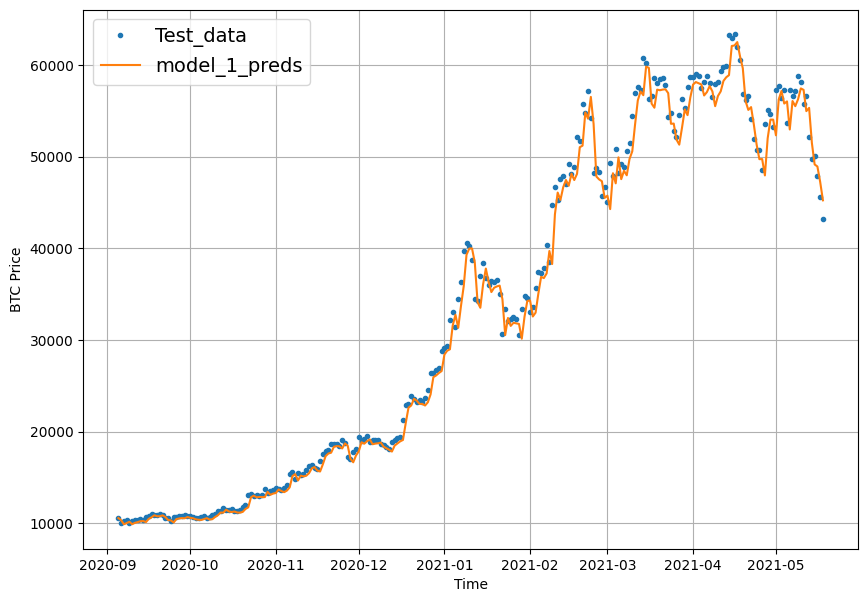

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")


# Model 2: Dense (window = 30, horizon = 1)



In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 624.3362


624.3362426757812

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 624.3362


624.3362426757812

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 6ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 624.3362,
 'mse': 1364268.1,
 'rmse': 1168.0189,
 'mape': 2.7784388,
 'mase': 1.0913458}

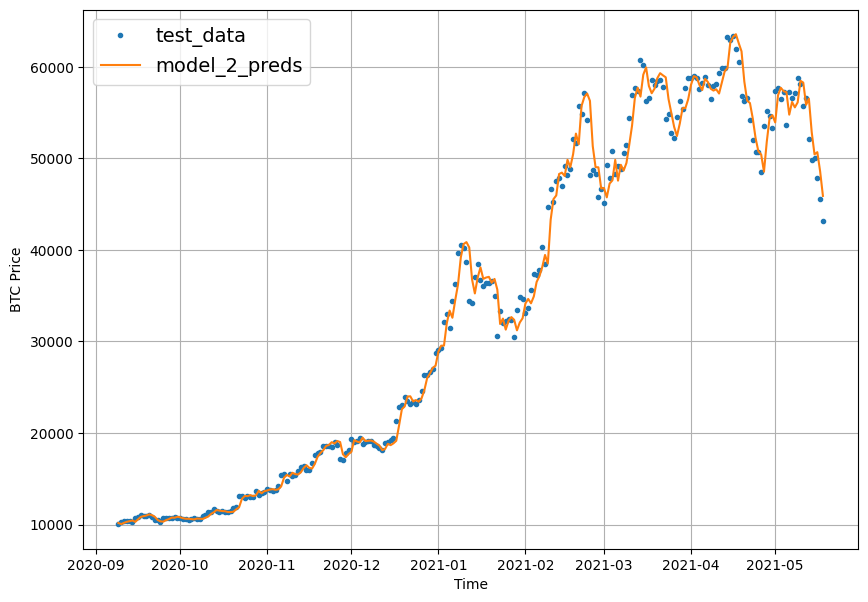

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")


Model 2 is worse than Model 1!

# Model 3: Dense (window = 30, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 5ms/step - loss: 1355.3267


1355.32666015625

In [ ]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 5ms/step - loss: 1230.7109


1230.7109375

- Even worse!
- But makes sense because the further you try and predict, the larger your error will be.

In [ ]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9318.889 , 9195.861 , 9172.112 , 9404.276 , 9359.463 , 9404.499 ,
        9650.818 ],
       [9004.021 , 8619.335 , 8868.246 , 9050.386 , 9179.182 , 9297.122 ,
        9459.67  ],
       [8838.969 , 8610.351 , 8668.448 , 8890.532 , 9071.893 , 9179.367 ,
        9266.008 ],
       [8973.887 , 9004.301 , 8853.407 , 9102.552 , 9172.709 , 9412.082 ,
        9301.0205],
       [8752.002 , 8952.481 , 8929.665 , 9176.645 , 9169.352 , 9094.307 ,
        9198.957 ]], dtype=float32)>

In [ ]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 564.77344 ,  448.98215 ,  352.4643  ,  490.54227 ,  487.2507  ,
         484.64877 ,  536.41223 ,  536.4458  ,  567.93787 ,  616.3276  ,
         802.40607 ,  795.6153  ,  880.5546  ,  888.0936  ,  606.2453  ,
         191.81291 ,  128.31828 ,  278.37213 ,  312.4142  ,  266.93115 ,
         215.14076 ,  199.51067 ,  329.35562 ,  339.2194  ,  163.86084 ,
         135.39195 ,  207.6384  ,  151.6365  ,  211.81535 ,  228.38582 ,
         260.1857  ,  390.2871  ,  323.7278  ,  364.2788  ,  248.87904 ,
         309.845   ,  301.8139  ,  235.06969 ,  238.64719 ,  187.0655  ,
         477.75287 ,   96.60331 ,  106.4239  ,  150.30203 ,  155.53947 ,
         135.23012 ,   75.49219 ,   97.191826,  104.66713 ,  199.134   ,
         170.56654 ,  136.21631 ,  201.3478  ,  116.6506  ,  187.9878  ,
         330.18088 ,  552.0822  ,  513.9829  ,  454.6338  ,  610.5243  ,
         352.95172 ,  181.49135 ,  213.09822 ,  351.71686 ,  375.4677  ,
         485.5544  ,  444.13162 ,  510.55573

## Making our evaluation function work for larger horizons

- The outputs for model_3_results are multi-dimensional.

- This is because the predictions are getting evaluated across the HORIZON timesteps (7 predictions at a time).

- To fix this, we adjust our evaluate_preds() function to work with multiple shapes of data.

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  #new!
  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1230.7109,
 'mse': 5347647.0,
 'rmse': 1416.9993,
 'mape': 5.5760484,
 'mase': 2.1899812}

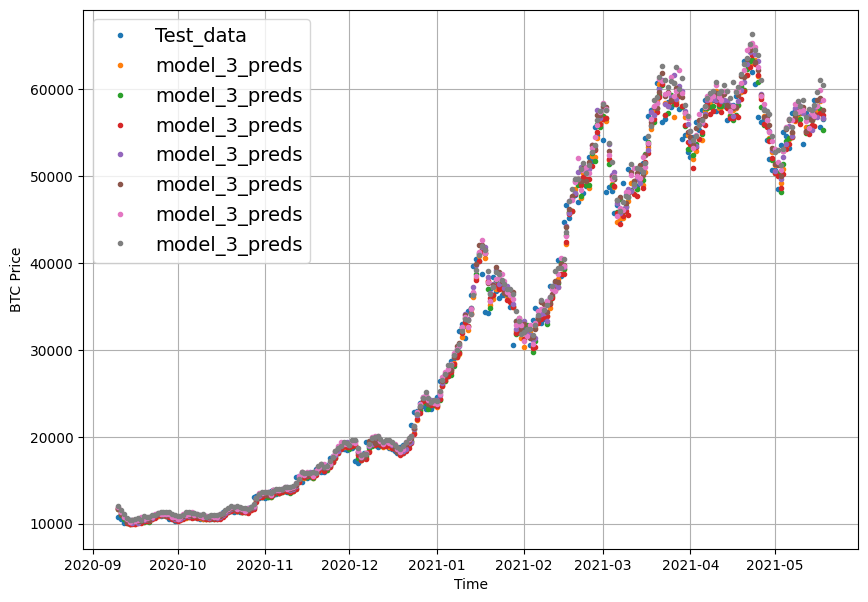

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

## Aggregate the Predictions
- Aggregating the predictions (e.g. reducing a 7-day horizon to one value such as the mean) loses information from the original prediction. As in, the model predictions were trained to be made for 7-days but by reducing them to one, we gain the ability to plot them visually but we lose the extra information contained across multiple days.

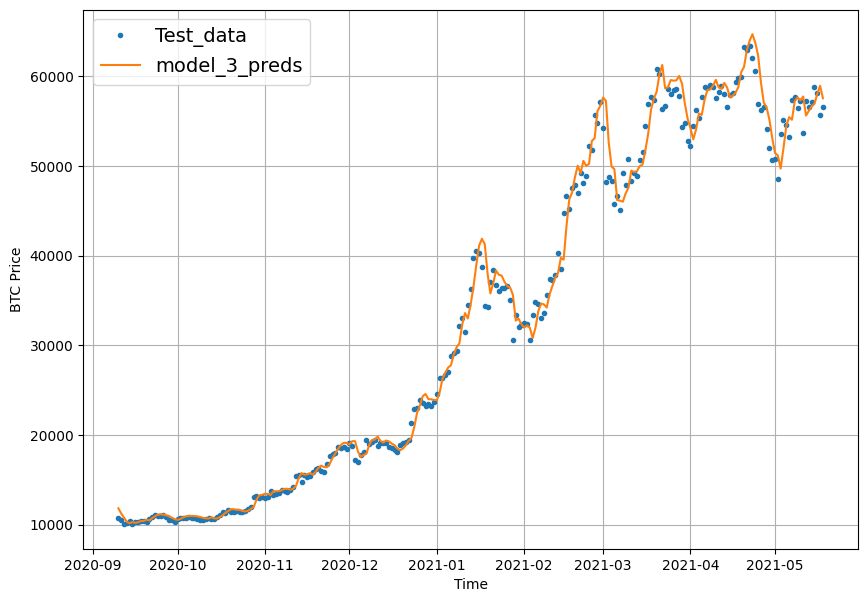

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

# Model Comparison


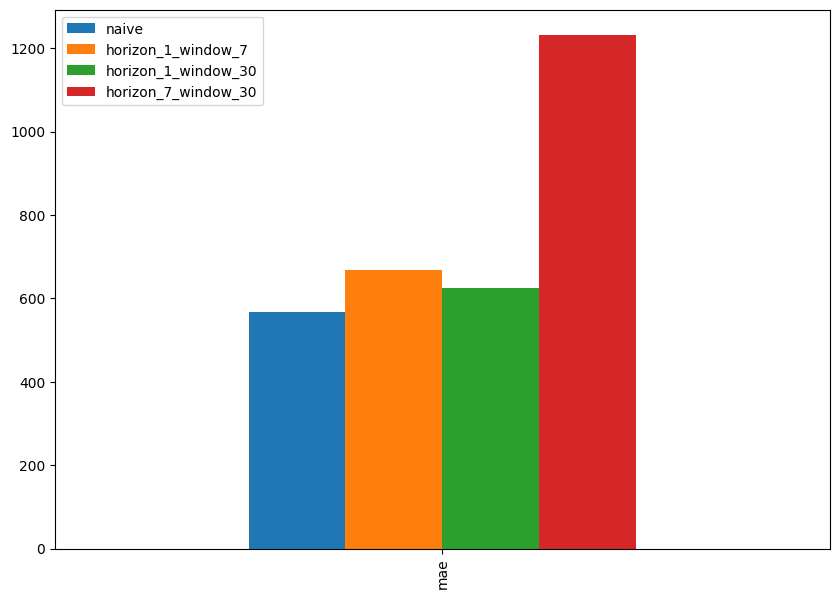

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");


Because of this, let's use HORIZON=1 and WINDOW_SIZE=7 for our next series of modelling experiments (in other words, we'll use the previous week of Bitcoin prices to try and predict the next day).

# Model 4: Conv1D
-  Conv1D models can be used for seq2seq (sequence to sequence) problems.

- In our case, the input sequence is the previous 7 days of Bitcoin price data and the output is the next day (in seq2seq terms this is called a many to one problem).

![conv1d](https://camo.githubusercontent.com/a3562fedd18e1e227b72cd6c29955ffbf8064f64f7fc78a2e8cb26ad006f0293/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d626974636f696e2d666f7265636173742d696e2d736571327365712d7465726d732e706e67)

In [ ]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [ ]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2224, 556, 2224, 556)

## Shape Issue
The `Conv1D` layer in TensorFlow takes an input of: **`(batch_size, timesteps, input_dim)`**.

In our case, the `batch_size` (by default this is 32 but we can change it) is handled for us but the other values will be:

- **`timesteps = WINDOW_SIZE`** - the timesteps is also often referred to as features, our features are the previous WINDOW_SIZE values of Bitcoin

- **`input_dim = HORIZON`** - our model views WINDOW_SIZE (one week) worth of data at a time to predict HORIZON (one day)



In [ ]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

### The shape must be (SIZE, 1)
To fix this, we could adjust the shape of all of our train_windows or we could use **`tf.keras.layers.Lamdbda`** (called a Lambda layer) to do this for us in our model.



The Lambda layer wraps a function into a layer which can be used with a model.

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])


In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 578.7564


578.7564086914062

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 8ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8878.359, 8777.85 , 8976.386, 8780.778, 8737.012, 8717.274,
       8652.967, 8520.654, 8452.758, 8492.474], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 578.7564,
 'mse': 1201503.9,
 'rmse': 1096.1313,
 'mape': 2.5885258,
 'mase': 1.0167147}

# Model 5: RNN (LSTM)
- We can also use a recurrent neural network to model our sequential time series data.

- Let's reuse the same data we used for the Conv1D model, except this time we'll create an LSTM-cell powered RNN to model our Bitcoin data.

## Shape Issue
- The `tf.keras.layers.LSTM()` layer takes a tensor with **`[batch, timesteps, feature]`** dimensions.

- The batch dimension gets taken care of for us but our data is currently only has the feature dimension (WINDOW_SIZE).

- To fix this, just like we did with the Conv1D model, we can use a tf.keras.layers.Lambda() layer to adjust the shape of our input tensors to the LSTM layer.


In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# expand input dimension to be compatible with LSTM
x = layers.LSTM(128, activation="relu")(x)
# using the tanh loss function results in a massive error
# Add another optional dense layer
x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])


In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 3ms/step - loss: 584.3412


584.3411865234375

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8906.946, 8785.881, 8973.989, 8791.807, 8726.704, 8728.434,
       8684.547, 8517.897, 8464.897, 8494.249], dtype=float32)>

In [ ]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 584.3412,
 'mse': 1217849.8,
 'rmse': 1103.5623,
 'mape': 2.644664,
 'mase': 1.0265256}

Even with an LSTM-powered RNN we weren't able to beat our naïve models results.

Perhaps adding another variable will help?

# Data Engineering: Making a **Multivariate Series**

- We will now integrate the bitcoin block reward size to give the model more context on how to predict future values.

What is the Bitcoin block reward size?

- The Bitcoin block reward size is the **number of Bitcoin someone receives from mining a Bitcoin block**.

- At its inception, the Bitcoin block reward size was 50.

But every four years or so, the Bitcoin block reward halves.

For example, the block reward size went from 50 (starting January 2009) to 25 on November 28 2012.

Let's encode this information into our time series data and see if it helps a model's performance.

In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


## Adding a Feature

In [ ]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

- **We get the days (indexes) for different block reward values.**



In [ ]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [ ]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


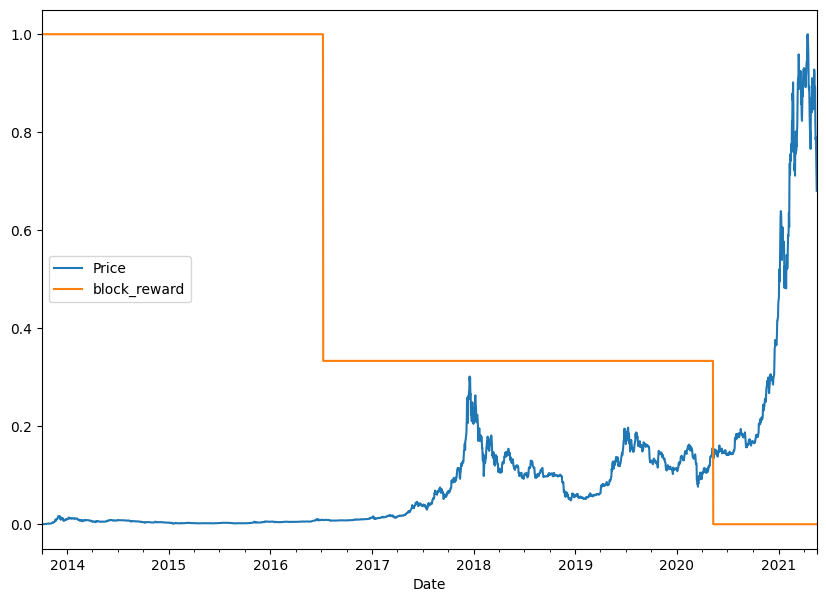

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

# Making a windowed dataset with pandas
- We will leverage `pandas.DataFrame.shift()` method to create a windowed multivariate time series.

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


We're trying to use the previous WINDOW_SIZE steps to predict HORIZON steps.

Window for a week (7) to predict a horizon of 1 (multivariate time series)
WINDOW_SIZE & block_reward -> HORIZON

[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]

We'll also **remove the NaN values** using pandas `dropna()` method, this equivalent to starting our windowing function at sample 0 (the first sample) + WINDOW_SIZE.

In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
# View labels
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

# Model 6: Dense (multivariate time series)

- To keep things simple, let's the model_1 architecture and use it to train and make predictions on our multivariate time series data.

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 565.7997


565.7996826171875

In [ ]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8815.7   , 8780.591 , 9054.213 , 8744.7295, 8764.656 , 8759.855 ,
       8650.362 , 8517.011 , 8470.51  , 8530.122 ], dtype=float32)>

In [ ]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 565.7997,
 'mse': 1151219.6,
 'rmse': 1072.949,
 'mape': 2.5308635,
 'mase': 0.99395335}

In [ ]:
model_1_results


{'mae': 668.2344,
 'mse': 1364410.9,
 'rmse': 1168.08,
 'mape': 3.093202,
 'mase': 1.1739028}

- It looks like the adding in the block reward may have helped our model slightly.

# Model 7: N-BEATS algorithm

- The N-BEATS algorithm focuses on univariate time series problems and achieved state-of-the-art performance in the winner of the M4 competition (a forecasting competition).

- For our next modelling experiment we're going to be replicating the generic architecture of the N-BEATS algorithm (see section 3.3 of the N-BEATS paper).

1. Replicating the model architecture in [Figure 1 of the N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf).


2. Using the same hyperparameters as the paper which can be found in [Appendix D of the N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf)

## Action Items
- Create a custom layer for the `NBeatsBlock` by subclassing `tf.keras.layers.Layer`
  - Creating a custom layer is helpful for when TensorFlow doesn't already have an existing implementation of a layer or if you'd like to make a layer configuration repeat a number of times

- Implementing a custom architecture using the Functional API



In [ ]:
#Create NBeats custom layer object

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):

    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers
    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast






## Observation
- The class inherits from `tf.keras.layers.Layer` (this gives it all of the methods assosciated with `tf.keras.layers.Layer`)

- The constructor (`def __init__(...)`) takes all of the layer hyperparameters as well as the **kwargs argument.
  - The **`kwargs`** argument **takes care of all of the hyperparameters which aren't mentioned** in the constructor such as, `input_shape`, `trainable` and `name`

- In the constructor, the block architecture layers are created:
  - The hidden layers are created as a stack of fully connected with `n_nuerons` hidden units layers with **ReLU** activation

  - The theta layer uses `theta_size` hidden units as well as linear activation

- The `call()` method is what is run when the layer is called:
  - It first passes the inputs (the historical Bitcoin data) through each of the hidden layers (a stack of fully connected layers with ReLU activation)

  - After the inputs have been through each of the fully connected layers, they get passed through the theta layer where the backcast (backwards predictions, shape: `input_size`) and forecast (forward predictions, shape: `horizon`) are returned

![layer subclassing](https://camo.githubusercontent.com/7e9d398b945875c7b04d1e15e27bef583274c5d8d09cb247325b46d4d47f0477/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d6e62656174732d62617369632d626c6f636b2d7265706c69636174696f6e2d776974682d74656e736f72666c6f772d6c617965722d737562636c617373696e672e706e67)

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
# input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [0.15700607 0.01258957 0.32677084 0.28378153 0.24210118 0.9586202
 0.23309815]
Forecast: 0.22012418508529663


## Data Prep for NBeats Algorithm
- This time, because we're going to be using a larger model architecture, to ensure our model training runs as fast as possible, we'll setup our datasets using the tf.data API.

- Because the N-BEATS algorithm is focused on univariate time series, we'll start by making training and test windowed datasets of Bitcoin prices (just as we've done above).

In [ ]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [ ]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
# make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

Now we convert them into TensorFlow `tf.data.Dataset` s to ensure they run as fast as possible whilst training.

We'll do this by:

1. Turning the arrays in tensor Datasets using tf.data.Dataset.from_tensor_slices()

2. Combine the labels and features tensors into a Dataset using `tf.data.Dataset.zip()`

3. Batch and prefetch the Datasets using `batch()` and `prefetch()`





In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

## Hyperparameter Tuning
- To begin, we'll create variables for each of the hyperparameters we'll be using for our N-BEATS replica.

![n-beats paper](https://camo.githubusercontent.com/8cfd3469b4fc083f3f8375726d64b5afc800b7c0f393b91648558c0cfa5d1dcf/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d6e62656174732d7461626c652d31382d6879706572706172616d65746572732e706e67)



In [ ]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## Residual Stacking
- The power of residual stacking or residual connections was revealed in [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) where the authors were able to build a deeper but less complex neural network.

- This is what introduced the popular [ResNet architecture](https://en.wikipedia.org/wiki/Residual_neural_network)

- A **residual connection** (also called skip connections) involves a deeper neural network layer receiving the outputs as well as the inputs of a shallower neural network layer.

- In the case of N-BEATS, the architecture uses residual connections which:

  - Subtract the backcast outputs from a previous block from the backcast inputs to the current block
  - Add the forecast outputs from all blocks together in a stack

- It's thought that they help avoid the problem of [**vanishing gradients**](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) (patterns learned by a neural network not being passed through to deeper layers).

## Double Residual Stacking
- Before we create the N-BEATS model, there are two layers to go through which play a large roll in the architecture.

- They make N-BEATS double residual stacking possible:
  - `tf.keras.layers.subtract(inputs)` - subtracts list of input tensors from each other

  - `tf.keras.layers.add(inputs)` - adds list of input tensors to each other



In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


## Implementing the N-BEATS Algorithm

1. Setup an instance of the N-BEATS block layer using `NBeatsBlock`.

2. Create an input layer for the N-BEATS stack. (Use Keras Functional API)

3. Make the initial backcast and forecasts for the model with the layer created in (1).
  - Also add the subtraction layer

  ![subtraction layer](https://user-images.githubusercontent.com/43738416/131282083-acc4d0dc-509e-4b27-b02c-cad28ff9bd36.png)

4. Use a for loop to create stacks of block layers.

5. Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts.

6. Create the double residual stacking using subtract and add layers.

7. Put the model inputs and outputs together using `tf.keras.Model()`

8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer.

9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  - **`tf.keras.callbacks.EarlyStopping()`** - stop the model from training if it doesn't improve validation loss for 200 epochs and restore the best performing weights using restore_best_weights=True (this'll prevent the model from training for loooongggggg period of time without improvement)

  - **`tf.keras.callbacks.ReduceLROnPlateau()`** - if the model's validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make incremental improvements (the smaller the learning rate, the smaller updates a model tries to make)

In [ ]:
%%time

tf.random.set_seed(42)

#1. Setup N-Beats Block Layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

#2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

#3. Create initial backcast and forecast input
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")


#4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)):
  #5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
    input_size=INPUT_SIZE,
    theta_size=THETA_SIZE,
    horizon=HORIZON,
    n_neurons=N_NEURONS,
    n_layers=N_LAYERS,
    name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])




Epoch 225: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 325: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 23s, sys: 2.39 s, total: 2min 25s
Wall time: 3min 29s


In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 24ms/step - loss: 580.7144 - mae: 580.7144 - mse: 1171429.1250


[580.7144165039062, 580.7144165039062, 1171429.125]

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8890.405, 8806.215, 9072.733, 8825.48 , 8773.057, 8805.91 ,
       8689.919, 8535.432, 8505.278, 8547.832], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 580.7144,
 'mse': 1171429.1,
 'rmse': 1082.3258,
 'mape': 2.6263118,
 'mase': 1.0201544}

- Still worse than the baseline!

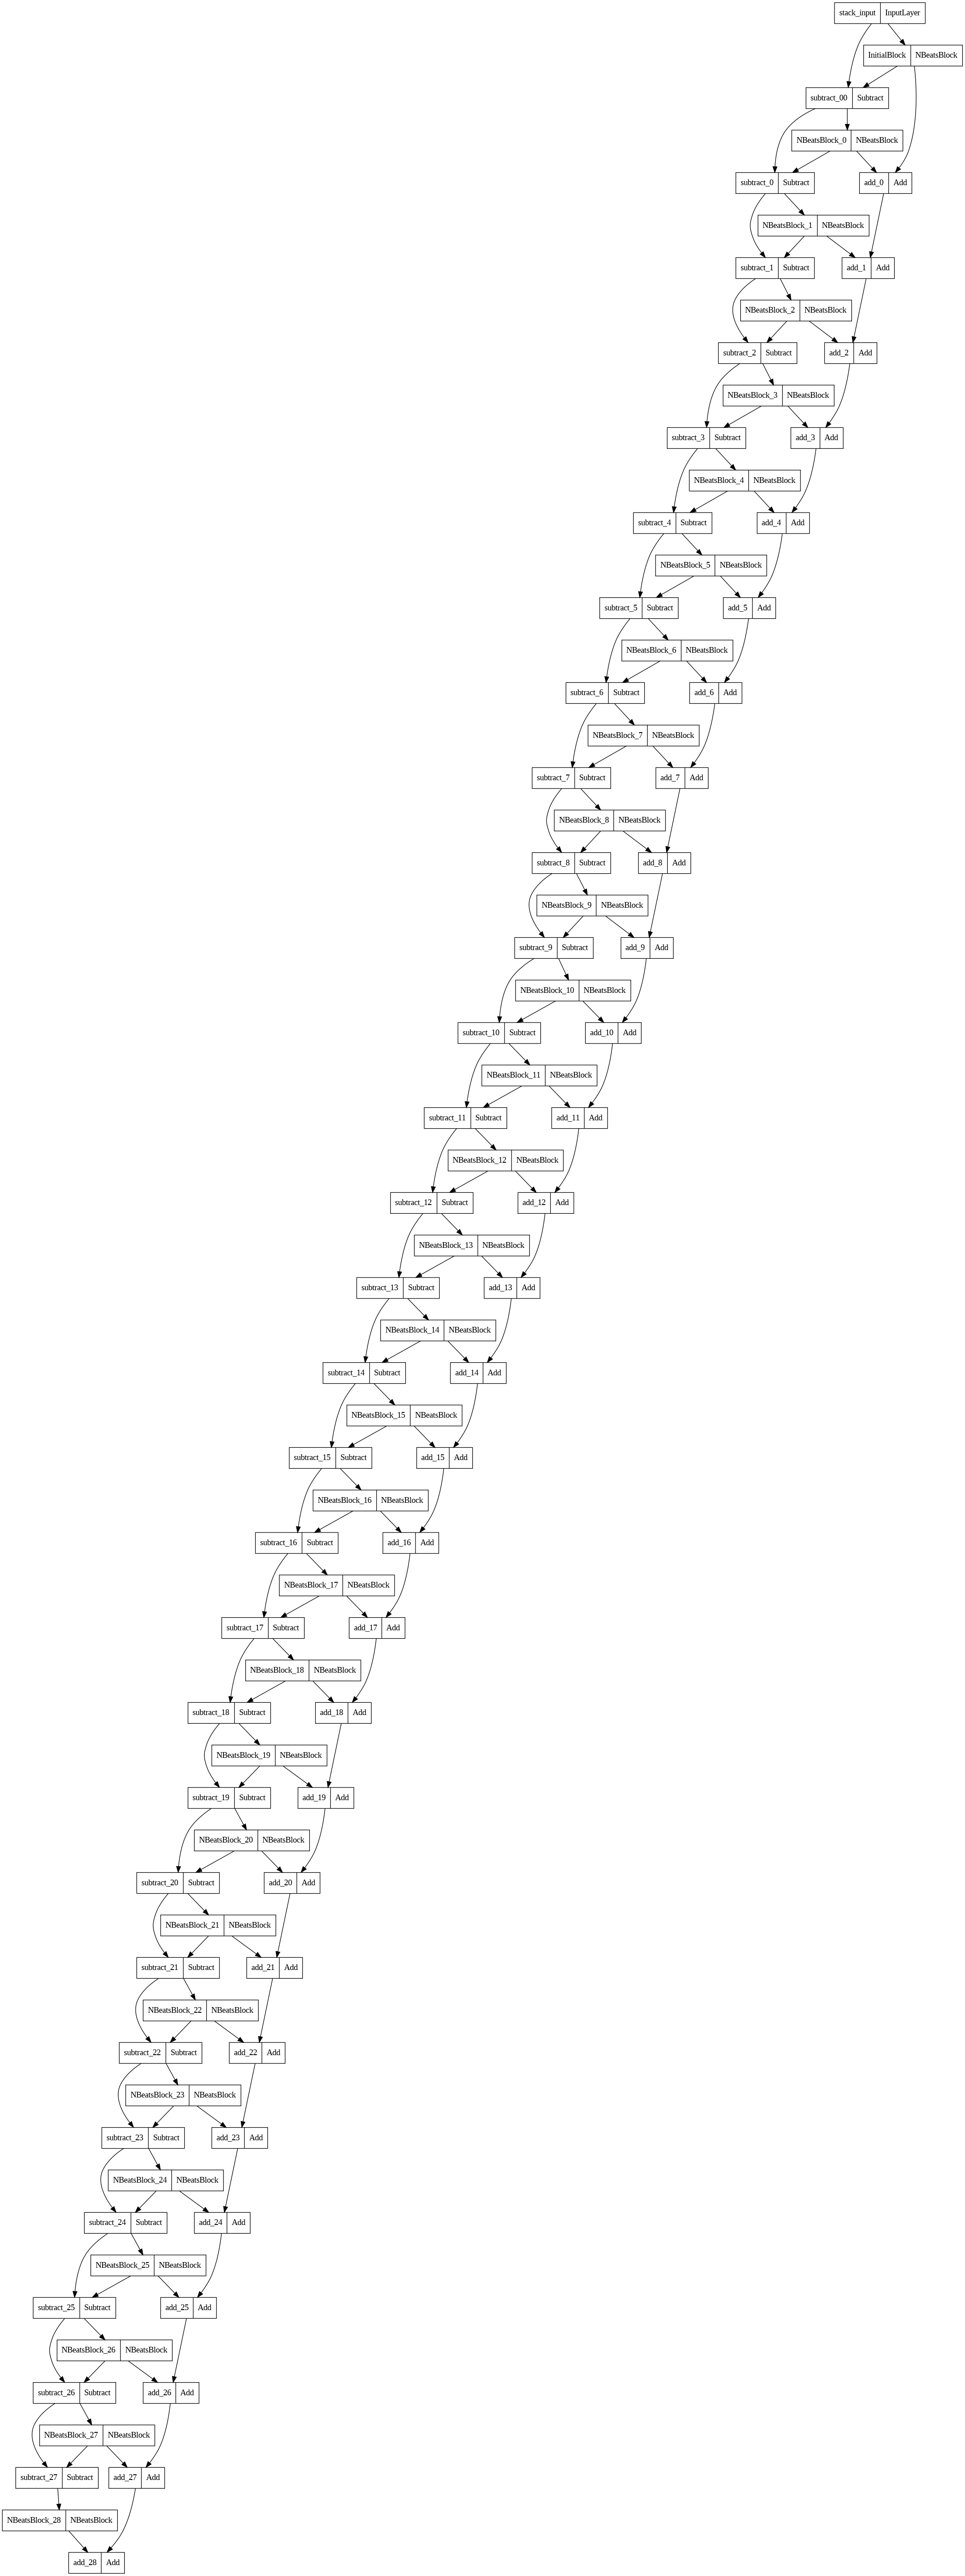

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

![comparison of model 7 with N-BEATS](https://camo.githubusercontent.com/103196a1fa7841a55dece0ca441ed4faf878f5acbdf8696085bb4daee637c301/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d6e62656174732d737461636b2d6d6f64656c2d76732d6e62656174732d6172636869746563747572652e706e67)


In [ ]:
# This will error out unless a "get_config()" method is implemented - this could be extra curriculum
model_7.save(model_7.name)

# 8. Ensemble Learning (Model Stacking)
- The N-BEATS algorithm's performance is underwhelming.

- Our next experiment is creating an [**ensemble of models**](https://en.wikipedia.org/wiki/Ensemble_learning).

- An ensemble involves training and combining multiple different models on the same problem. Ensemble models are often the types of models you'll see winning data science competitions on websites like Kaggle.

In the N-BEATS paper, they trained an ensemble of models (180 in total, see section 3.4) to achieve the results they did using a combination of:

  - Different loss functions (sMAPE, MASE and MAPE)
  - Different window sizes (2 x horizon, 3 x horizon, 4 x horizon...)

It wouldn't make sense to train the same model 10 times on the same data and then average the predictions.

Fortunately, due to their random initialization, even deep learning models with the same architecture can produce different results.

Each time they create an ML model, it starts with **random patterns** (weights & biases) and then it **adjusts** these random patterns to better suit the dataset it's being trained on.

To create our ensemble models we're going to be using a combination of:

- **Different loss functions (MAE, MSE, MAPE)**
- **Randomly initialized models**

Essentially, we'll be creating a suite of different models all attempting to model the same data.

And hopefully the combined predictive power of each model is better than a single model on its own.



In [ ]:
def get_ensemble_models(horizon = HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]
                        ):
  # Make empty list for trained ensemble models
  ensemble_models = []

  #Create num_iter number of models per loss function
  for i in range(num_iter):
    for loss_function in loss_fns:
      # Build and fit a new model with a different loss function
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

       # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models


We try it by running num_iter=5 runs for 1000 epochs. This will result in **15 total models** (5 for each different loss function).

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 394: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 931: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 333: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 433: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 118: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 485: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 585: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 697: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 863: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 963:

## Making Predictions with the Ensemble Model


In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 42ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8801.789,  8817.04 ,  9090.178, ..., 50432.676, 48692.098,
        46274.26 ],
       [ 8812.588,  8732.195,  8958.771, ..., 49826.156, 48675.066,
        45887.566],
       [ 8800.527,  8767.062,  9050.694, ..., 50286.86 , 48043.   ,
        47108.25 ],
       ...,
       [ 8657.868,  8779.767,  9006.739, ..., 49907.402, 48591.99 ,
        45580.07 ],
       [ 8748.737,  8796.237,  9054.028, ..., 49430.723, 48623.82 ,
        46337.188],
       [ 8802.316,  8794.107,  8969.619, ..., 50637.234, 48523.082,
        46004.434]], dtype=float32)>

### Combining the Results
- However, since we've trained 15 models, there's going to be 15 sets of predictions.
- Rather than comparing every set of predictions to the ground truth, let's take the median.

> When the data come from distributions with thick tails, the sample median is more efficient. When the data come from distributions with a thin tail, like the normal, the sample mean is more efficient.

![tails](https://www.johndcook.com/ARE.gif)
- The curve crosses the top horizontal line at 4.67879.

- For values of ν less than that cutoff, the median is more efficient.

- For larger values of ν, the mean is more efficient.

- As ν gets larger, the relative efficiency of the median approaches the corresponding relative efficiency for the normal, 2/π = 0.63662, indicated by the bottom horizontal line.

- When ν = 1, the Student-t is a Cauchy distribution and the sample mean wanders around without converging to anything, though the sample median behaves well. As ν increases, the Student-t becomes more like the normal and the relative efficiency of the sample median decreases.

In [ ]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 569.3521,
 'mse': 1147104.0,
 'rmse': 1071.0294,
 'mape': 2.556812,
 'mase': 1.000194}

# Plotting Prediction Intervals (Uncertainty Estimates)
- Right now all of our model's (prior to the ensemble model) are predicting single points.

- If a model is predicting the price of Bitcoin to be 50,000USD tomorrow, would it be helpful to know it's predicting the 50,000USD because it's predicting the price to be between 48,000 and 52,000USD?

- You'd know that although the model is predicting 50,000USD (a point prediction, or single value in time), the value could actually be within the range 48,000USD to 52,000USD

- These kind of prediction ranges are called **prediction intervals** or **uncertainty estimates**.

- Because **point predictions** are almost always going to be wrong. So having a range of values can help with decision making.


## The Bootstrap Method
One way of getting the 95% condfidnece prediction intervals for a deep learning model is the **bootstrap method**:

1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble model)

2. Measure the standard deviation of the predictions.

3. Multiply standard deviation by 1.96 (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations of the mean, this is why we initialized our neural networks with a normal distribution)

4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)




In [ ]:
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds,axis=0)

  interval = 1.96*std

  preds_mean = tf.reduce_mean(preds,axis=0)
  lower,upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

Now we've got the upper and lower bounds for the the 95% prediction interval, let's plot them against our ensemble model's predictions.

We want:

- The test data (the ground truth Bitcoin prices)
- The median of the ensemble predictions
- The 95% prediction intervals (assuming the data is Gaussian/normal, the model is saying that 95% of the time, predicted value should fall between this range)

To do so, we can use our plotting function as well as the **`matplotlib.pyplot.fill_between()`** method to shade in the space between the upper and lower bounds.

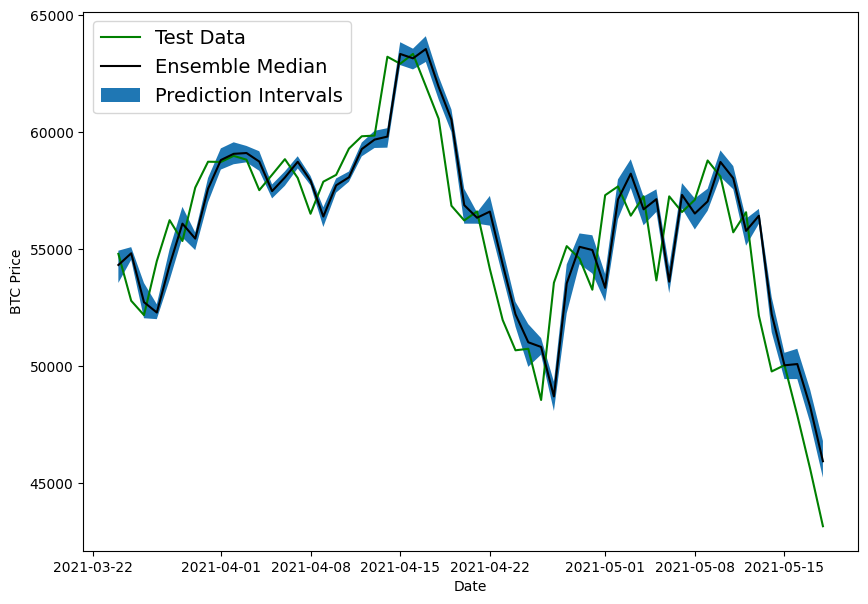

In [ ]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

# Conclusions
- It looks like the ensemble predictions are lagging slightly behind the actual data.

- And the prediction intervals are fairly low throughout.

- The combination of **lagging predictions** as well as **low prediction intervals** indicates that our ensemble model may be **overfitting** the data, meaning it's basically* replicating what a naïve model would do and just predicting the previous timestep value for the next value*.


# Model 9: Simple Model with Full Historical Data

- To make predictions into the future, we'll train a model on the full dataset and then get to make predictions to some future horizon.

- Previously, we split our data into training and test sets to evaluate how our model did on pseudo-future data (the test set).

But since the goal of a forecasting model is to predict values into the actual-future, we won't be using a test set.

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before


In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days


Alright, let's create a function which returns INTO_FUTURE forecasted values using a trained model.

1. Function which takes as input:
  - a list of values (the Bitcoin historical data)
  - a trained model (such as model_9)
  - a window into the future to predict (our INTO_FUTURE variable)
  - the window size a model was trained on (WINDOW_SIZE) - the model can only predict on the same kind of data it was trained on

2. Creates an empty list for future forecasts (this will be returned at the end of the function) and extracts the last WINDOW_SIZE values from the input values (predictions will start from the last WINDOW_SIZE values of the training data)

3. Loop INTO_FUTURE times making a prediction on WINDOW_SIZE datasets which update to remove the first the value and append the latest prediction

In [ ]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:

  # Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast


In [ ]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 64ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55839.6953125

1/1 [==============================] - 0s 24ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55839.6953125 ] -> Prediction: 51023.8203125

1/1 [==============================] - 0s 39ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55839.6953125  51023.8203125 ] -> Prediction: 49770.15234375

1/1 [==============================] - 0s 36ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55839.6953125  51023.8203125  49770.15234375] -> Prediction: 48296.875

1/1 [==============================] - 0s 42ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55839.6953125
 51023.8203125  49770.15234375 48296.875     ]

In [ ]:
future_forecast[:10]

[55839.695,
 51023.82,
 49770.152,
 48296.875,
 46742.145,
 48471.79,
 46869.477,
 55019.17,
 49625.17,
 49314.89]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date
  to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D")
  # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]")
  # return a date range between start date and end date


In [ ]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55839.695, 51023.82 , 49770.152, 48296.875, 46742.145,
        48471.79 , 46869.477, 55019.17 , 49625.17 , 49314.89 , 47972.82 ,
        47417.22 , 50671.848, 48602.867], dtype=float32))

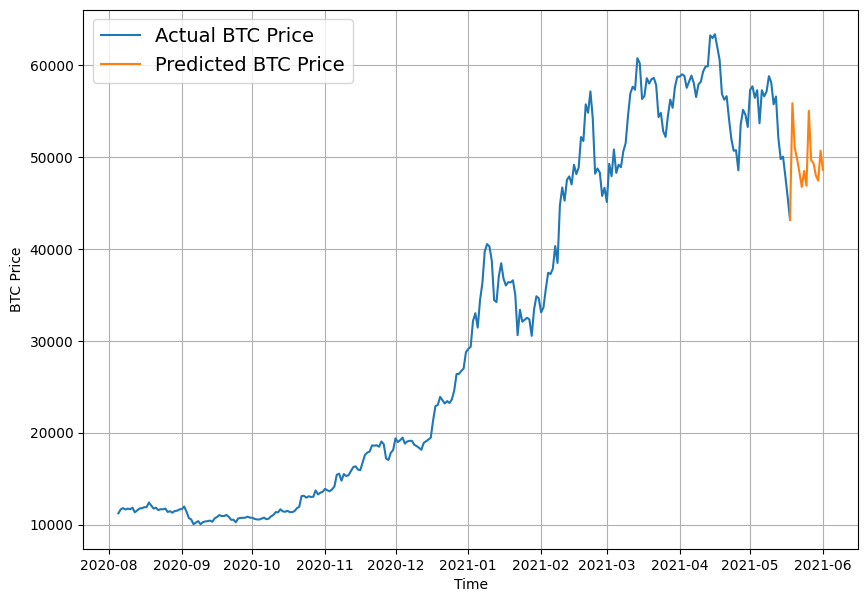

In [ ]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

It looks like our predictions are starting to form a bit of a cyclic pattern (up and down in the same way).

Perhaps that's due to our model overfitting the training data and not generalizing well for future data. Also, as you could imagine, the further you predict into the future, the higher your chance for error

# Comparing Models

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1147547.000,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,668.234375,1364410.875,1168.079956,3.093202,1.173903
model_2_dense_w30_h1,624.336182,1364268.125,1168.018921,2.778439,1.091346
model_3_dense_w30_h7,1230.710938,5347647.000,1416.999268,5.576048,2.189981
model_4_CONV1D,578.756409,1201503.875,1096.131348,2.588526,1.016715
model_5_LSTM,584.341187,1217849.750,1103.562256,2.644664,1.026526
model_6_multivariate,565.799683,1151219.625,1072.948975,2.530864,0.993953
model_8_NBEATs,580.714417,1171429.125,1082.325806,2.626312,1.020154
model_9_ensemble,569.352112,1147104.000,1071.029419,2.556812,1.000194


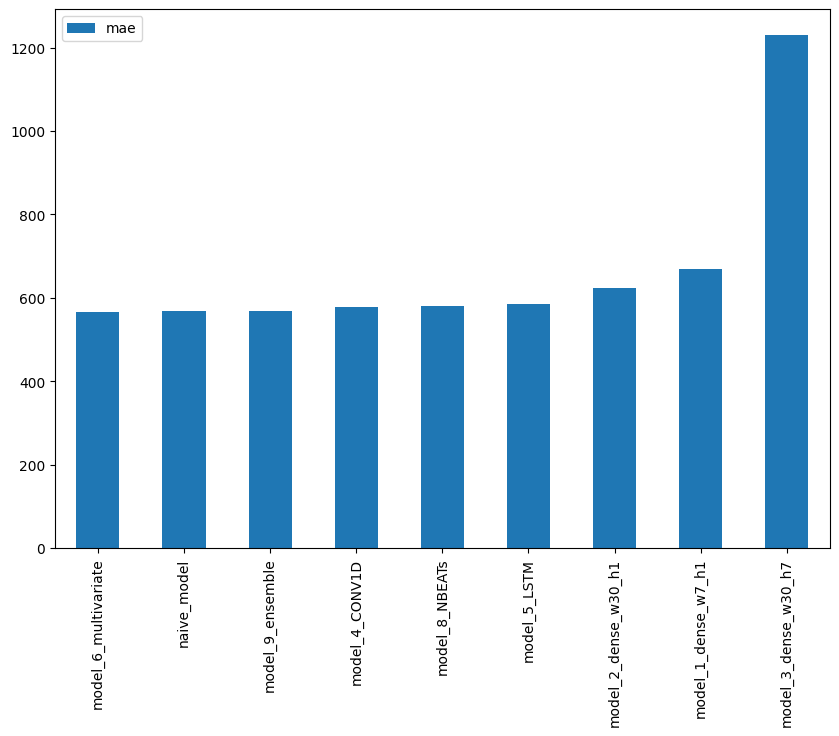

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");
